In [2]:
import sys
sys.path.append('..')
import quarantines as Q
import quarantines_mongo as qm
import graph_generators as gg 
import networkx as nx 
import networkit as nk
import pymongo
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from scipy import stats
from pprint import pprint
import os 
import random
import experiment_helpers as eh
import utils
sns.set()

In [2]:
## Want to run a scatter plot for 'clustering coefficient' vs total 'recovery' property
def get_best_recovery(G, tau, gamma, num_init, num_iter, resolution=100):
    pass

In [3]:
def get_vcurve(G, tau, gamma, num_init, num_iter, resolution=100):
    tups_by_qprop = {} 
    for i in range(resolution):
        print(i, resolution)
        qprop = i / resolution 
        tups = Q.quarantine_by_prop(G, tau, gamma, num_init / len(G), qprop, float('inf'), num_iter=num_iter)
        tups_by_qprop[qprop] = tups 
    return tups_by_qprop

In [ ]:
G = gg.plc_graph(10 **4, 10, 0.5)

qrpops = get_vcurve(G, 0.5, 1.0, 10, 5, resolution=25)

In [ ]:
G2 = gg.plc_graph(10 **4, 10, 0.9)

qrpops2 = get_vcurve(G2, 0.5, 1.0, 10, 5, resolution=25)

In [ ]:
nx.average_clustering(G), nx.average_clustering(G2),nx.average_clustering(G3)

In [ ]:
G3 = gg.plc_graph(10 **4, 10, 1.0)
qrpops3 = get_vcurve(G3, 0.5, 1.0, 10, 5, resolution=25)

In [14]:
def plot_vcurve(qp, fig, ax, c, N=10** 4, label=None):
    trips = []
    for k, tup in sorted(qp.items(), key=lambda item: item[0]):
        Rs = [_.get_final_R() / N for _ in tup]
        print(Rs)
        trips.append((k, np.mean(Rs), np.std(Rs)))
        
    ax.plot(*utils.select_mean(trips), color=c, label=label)
    ax.fill_between(*utils.plotfill_trips(trips), color=c, alpha=0.2)
    
    

NameError: name 'qrpops' is not defined

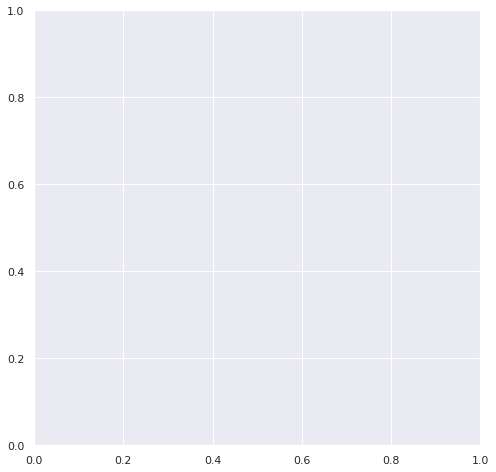

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
plot_vcurve(qrpops, fig, ax, utils.c(0),label='CC 0.1')
plot_vcurve(qrpops2, fig, ax, utils.c(1), label='CC 0.2')
plot_vcurve(qrpops3, fig, ax, utils.c(3), label='CC 0.3')
ax.legend()
ax.set_title("Total Infected vs. Quarantine Threshold under Varying Clustering")
ax.set_xlabel("Quarantine Threshold")
ax.set_ylabel("Total Proportion Infected")

In [6]:
smallG = gg.ba_graph(10 ** 4, 10)
bigG = gg.ba_graph(10 ** 5, 10)

In [7]:
small_qr = get_vcurve(smallG, 0.5, 1.0, 10, 5, resolution=25)
big_qr = get_vcurve(bigG, 0.5, 1.0, 10, 5, resolution=25)

0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25


[0.9935, 0.9933, 0.9932, 0.9953, 0.993]
[0.9921, 0.9901, 0.9905, 0.9912, 0.9906]
[0.9869, 0.9844, 0.9851, 0.9867, 0.9837]
[0.9809, 0.9853, 0.9825, 0.983, 0.9839]
[0.9746, 0.9735, 0.9764, 0.9735, 0.9779]
[0.9704, 0.9684, 0.9743, 0.97, 0.9644]
[0.9636, 0.9622, 0.965, 0.9616, 0.9665]
[0.9557, 0.9504, 0.9528, 0.954, 0.9508]
[0.942, 0.9422, 0.9397, 0.9431, 0.9444]
[0.934, 0.9307, 0.9407, 0.9333, 0.9279]
[0.9156, 0.9104, 0.9172, 0.916, 0.9178]
[0.9094, 0.9116, 0.9125, 0.9088, 0.9075]
[0.8913, 0.8849, 0.8902, 0.8846, 0.8791]
[0.8659, 0.8832, 0.8743, 0.8628, 0.8792]
[0.8559, 0.8606, 0.5624, 0.8445, 0.8579]
[0.8296, 0.8329, 0.8366, 0.8244, 0.8324]
[0.8215, 0.8032, 0.8084, 0.8151, 0.804]
[0.7871, 0.7783, 0.7839, 0.806, 0.7725]
[0.7222, 0.7422, 0.7632, 0.735, 0.7787]
[0.7684, 0.7802, 0.7652, 0.7696, 0.7629]
[0.8017, 0.8031, 0.8026, 0.8017, 0.8084]
[0.8418, 0.8436, 0.8425, 0.842, 0.8432]
[0.8812, 0.8812, 0.8811, 0.8826, 0.8816]
[0.9211, 0.9212, 0.9213, 0.9218, 0.9214]
[0.961, 0.961, 0.961, 0.9613,

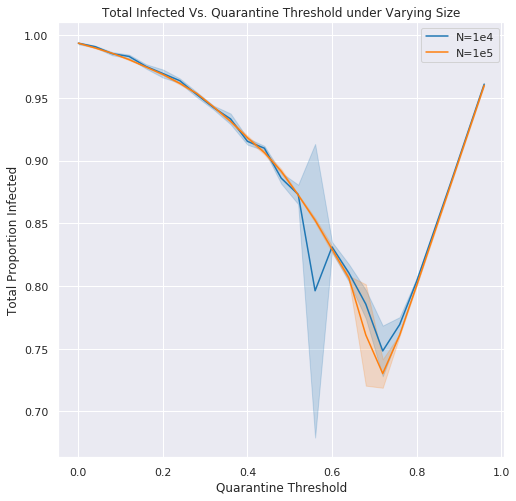

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
plot_vcurve(small_qr, fig, ax, c=utils.c(0), label="N=1e4")
plot_vcurve(big_qr, fig, ax, c=utils.c(1), N = 10 ** 5, label="N=1e5")
ax.set_title("Total Infected Vs. Quarantine Threshold under Varying Size")
ax.set_xlabel("Quarantine Threshold")
ax.set_ylabel("Total Proportion Infected")
ax.legend()

In [10]:
def get_plc_cluster(N, m, cluster):
    low_cluster = gg.plc_graph(N, m, 0)
    high_cluster = gg.plc_graph(N, m, 1.0)
    lo, lo_val = 0, nx.average_clustering(low_cluster)
    hi, hi_val = 1, nx.average_clustering(high_cluster)
    assert lo_val <= cluster <= hi_val
    cur, cur_val = lo, lo_val
    while abs(cur_val - cluster) > 0.001:
        print("CUR", cur)
        cur = (lo + hi) / 2 
        G = gg.plc_graph(N, m, cur)
        cur_val = nx.average_clustering(G)
        if cluster > cur_val:
            lo, lo_val = cur, cur_val 
        else:
            hi, hi_val = cur, cur_val
    return cur, G


get_plc_cluster(10 *1000, 10, 0.25)

CUR 0
CUR 0.5
CUR 0.75
CUR 0.875
CUR 0.9375


0.96875

In [14]:
nx.average_clustering(gg.plc_graph(10 * 1000, 10, 0.96875))

0.251717484917635